# Come NON diventare ricchi con Python

Questa sessione è pensata per dare qualche spunto pratico a chi ha la necessità di manipolare i dati usando Python e SQL Server.

Il notebook che state guardando è solo la prima parte, giusto per prendere confidenza con Python e con le librerie usate per la manipolazione dei dati (pandas e numpy) e quelle per il plotting dei dati (matplotlib e plotly).

Ci sono tonnellate di librerie per Python, alcune anche legate al mondo finanziario e questa sessione non ha assolutamente la pretesa di elencarle o dimostrarle tutte... A voi il divertimento ! :-)

  

Mi raccomando!!! Le demo che vedrete servono solamente a darvi qualche idea, **NON** usatele per giocare in borsa con soldi veri!!!

In [4]:
import time
import datetime
import pandas as pd
import pandas_datareader as web
import numpy as np

## Scaricare i dati finanziari da Yahoo Finance

Uno dei (pochi) siti da cui è possibile scaricare gratuitamente i valori degli scambi di borsa di titoli o ETF è Yahoo Finance.

Esempio: [https://finance.yahoo.com/quote/MSFT/history?p=MSFT](https://finance.yahoo.com/quote/MSFT/history?p=MSFT)

  

La libreria **pandas\_datareader** ha una funzione per scaricare i dati storici dal sito Yahoo Finance indicando il simbolo dell'azione/ETF ed i range di data di cui scaricare i dati.

In [9]:
#
# Demo - Scaricare i dati storici da Yahoo Finance
#
symbol     = 'MSFT'

# Old method - Yahoo changed its web service and now is not working anymore...
# start_date = datetime.datetime(2020, 1, 1) 
# end_date   = datetime.date.today()
# data = web.DataReader(symbol, 'yahoo', start_date, end_date)

epoch_start = 1577847600
epoch_end = int(time.time())
url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={epoch_start}&period2={epoch_end}&interval=1d&events=history&includeAdjustedClose=true'
        
data = pd.read_csv(url)

#data.head(5) 
data.tail(5)

#print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02  158.779999  160.729996  158.330002  160.619995  157.903473   
1    2020-01-03  158.320007  159.949997  158.059998  158.619995  155.937286   
2    2020-01-06  157.080002  159.100006  156.509995  159.029999  156.340363   
3    2020-01-07  159.320007  159.669998  157.320007  157.580002  154.914902   
4    2020-01-08  158.929993  160.800003  157.949997  160.089996  157.382416   
..          ...         ...         ...         ...         ...         ...   
449  2021-10-13  294.910004  297.279999  293.489990  296.309998  296.309998   
450  2021-10-14  299.209991  303.269989  297.829987  302.750000  302.750000   
451  2021-10-15  302.339996  304.450012  300.519989  304.209991  304.209991   
452  2021-10-18  303.570007  308.209991  302.690002  307.290009  307.290009   
453  2021-10-19  308.350006  309.299988  307.220001  308.230011  308.230011   

       Volume  
0    22622100  
1    21116200  
2  

## Che cosa fare con i dati scaricati ?

Una volta scaricati i dati storici di un azione o ETF si possono calcolare alcuni indicatori che sono alla base delle più comuni strategie di trading.

Quelli che utilizzeremo in questi esempi sono:

\- Media mobile esponenziale (Exponential Mobile Average, EMA)

\- Media mobile semplice (Simple Moving Average, SMA)

\- Convergenza e divergenza di medie mobili (Moving average convergence divergence, MACD) [Wikipedia](https://it.wikipedia.org/wiki/MACD)

\- Bande di Bollinger

In [10]:
#
# Demo - Calcolo gli indicatori statistici
#

data.reset_index(inplace=True,drop=False)

# Medie mobili a 12 e 26 giorni
data['12d_EMA'] = data.Close.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.Close.ewm(span=26, adjust=False).mean()

# Bollinger bands
data['20d_SMA'] = data['Close'].rolling(window=20).mean()
data['20d_STD'] = data['Close'].rolling(window=20).std()
data['Bollinger_H'] = data['20d_SMA'] + (data['20d_STD'] * 2)
data['Bollinger_L'] = data['20d_SMA'] - (data['20d_STD'] * 2)

# MACD
data['macd'] = data['12d_EMA'] - data['26d_EMA'] 
data['macdsignal'] = data.macd.ewm(span=9, adjust=False).mean()
data['trading_signal'] = np.where(data['macd'] >= data['macdsignal'], 1, -1)

data.tail(5)

,index,Date,Open,High,Low,Close,Adj Close,Volume,12d_EMA,26d_EMA,20d_SMA,20d_STD,Bollinger_H,Bollinger_L,macd,macdsignal,trading_signal
449,449,2021-10-13,294.910004,297.279999,293.489990,296.309998,296.309998,23416300,292.917924,293.492576,293.124500,6.328647,305.781793,280.467206,-0.574652,-1.172775,1
450,450,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900,294.430551,294.178311,293.000999,6.100163,305.201325,280.800674,0.252240,-0.887772,1
451,451,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700,295.935080,294.921399,293.217999,6.425870,306.069739,280.366259,1.013682,-0.507481,1
452,452,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300,297.681992,295.837592,293.867500,7.155999,308.179498,279.555503,1.844400,-0.037105,1
453,453,2021-10-19,308.350006,309.299988,307.220001,308.230011,308.230011,17654900,299.304764,296.755549,294.539001,7.845052,310.229105,278.848898,2.549215,0.480159,1


## Plotting dei dati

Non è proprio facilissimo leggere la tabella appena vista, giusto?  
Allora per semplificarci la vita ed avere un "colpo d'occhio" più efficace nel capire se è il momento di acquistare o di vendere un bel grafico è quello che ci vuole!

La libreria **matplotlib** ci fornisce la possibilità di creare grafici in modo molto semplice e veloce...

/Users/ddominici/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/ddominici/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


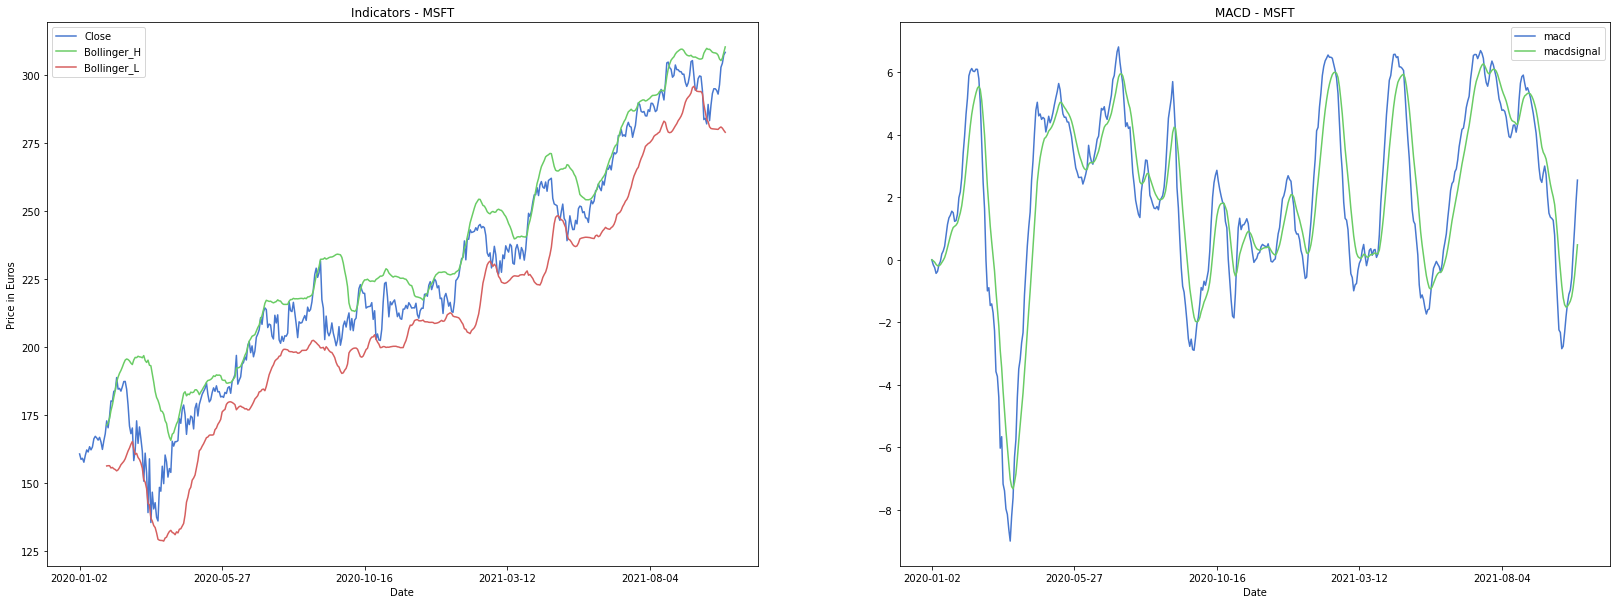

In [12]:
#
# Demo - Plot degli indicatori usando la libreria matplotlib
#
import matplotlib.pyplot as plt

data_to_plot = data #data.iloc[-30:]

plt.style.use('seaborn-muted')

fig, ax = plt.subplots(1, 2, figsize=(28, 10))

ax[0].set(title = 'Indicators - ' + symbol, ylabel = 'Price in Euros', xlabel = 'Date')
#data_to_plot[['Date','Close','12d_EMA','26d_EMA','Bollinger_H','Bollinger_L']].plot(ax=ax[0], x='Date')
data_to_plot[['Date','Close','Bollinger_H','Bollinger_L']].plot(ax=ax[0], x='Date')

ax[1].set_title('MACD - ' + symbol)
data_to_plot[['Date','macd','macdsignal']].plot(ax=ax[1], x='Date')

plt.legend()

#filename = basePath + ticker + '_1.png'
#plt.savefig(filename)

plt.show()

Oppure posso utilizzare la libreria **Plotly**, più interattiva e con alcune tipologie di grafici già pronte all'uso per i dati finanziari (es. i grafici candlestick)

In [14]:
#
# Demo - Plot degli indcatori usando la libreria Plotly
#
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Creo il grafico per gli ultimi 90 giorni
data_to_plot = data.iloc[-90:]

# Imposto la data come indice del dataframe
data_to_plot.set_index('Date', inplace=True)

# Creo tre grafici, in verticale, di altezza variabile
fig = make_subplots(rows=3,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02,
                    row_width=[0.1, 0.1, 0.8]
                    )

# Primo grafico: candlestick con i dati di minimo, massimo, apertura e chiusura degli scambi
fig.add_trace(
    go.Candlestick(
        x=data_to_plot.index,
        low=data_to_plot['Low'],
        high=data_to_plot['High'],
        close=data_to_plot['Close'],
        open=data_to_plot['Open'],
        increasing_line_color='green',
        decreasing_line_color='red'
    ),
    row=1,
    col=1
)

# Secondo grafico: volume degli scambi del titolo
fig.add_trace(go.Bar(x=data_to_plot.index, y=data_to_plot['Volume']), row=2, col=1)

# Terzo grafico: segnale di trading calcolato sull'indicatore MACD visto in precedenza
fig.add_trace(go.Bar(x=data_to_plot.index, y=data_to_plot['trading_signal']), row=3, col=1)

# Impostazioni grafico
fig.layout.xaxis1.type = 'category'
fig.layout.xaxis2.type = 'category'
fig.layout.xaxis3.type = 'category'

today = datetime.datetime.today().strftime("%d-%m-%Y")
title = "Interactive CandleStick & Volume Chart {symbol} - {date}".format(symbol=symbol, date=today)

fig.update_layout(title=title,
                #yaxis1_title='Close (€)',
                #yaxis2_title='Volume (M)',
                #xaxis2_title='Time',
                #xaxis1_rangeslider_visible=False,
                #xaxis2_rangeslider_visible=False
                )

# Visualizzo il grafico
fig.show()

# Se voglio, posso salvare il grafico (statico) in formato png/jpeg/tiff
#filename = "./images/%s.png" % symbol
#fig.write_image(filename, width=1024, height=800, scale=2)


## Bene, e ora?

Fin qui tutto chiaro? Bene.

Ora viene la parte più divertente, memorizzare i dati su SQL Server ed attingere dal database per leggere i dati, calcolare indicatori e magari generare notifiche quando cambia il trading signal di un azione o ETF.

  

Let's go!